## 영화 리뷰 분류: 이진 분류 예제 

IMDB 데이터셋: 인터넷 영화 데이터 베이스로 양극단의 리뷰 5만개

Training data 25,000개 & Test data 25,000개로 나눠져 있음.

MNIST처럼 Keras에 기본으로 포함되어 있음

데이터는 전처리 되어 있어서 포함되어 있는 단어들이 모두 숫자로 변환되어 있음

In [1]:
#데이터의 준비 : 
#신경망에 숫자 리스트를 바로 주입할 수 없음(텐서로 변환해야 함.)
#원 핫 인코딩을 사용해서 10,000차원의 벡터로 변환해서 사용

In [2]:
import keras
keras.__version__

'2.8.0'

In [3]:
from keras.datasets import imdb
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=10000) #자주 사용하는 숫자 1만개만 가지고 오겠다고 제약을 줌


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_label[0]

1

In [6]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()

# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review  # 위의 라벨1이 positive임을 알 수 있음..(?)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #첫번째 레이어에서만 입력에 대한 모양을 지정하면 나머지는 알아서 함.
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # 레이어를 3개 추가한다. 신경망 설계 끝

In [22]:
from keras import losses
from keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,  #sigmoid 둘 중 하나의 문제는 손실값은이걸로 쓴다고 공식적으로 생각
              metrics=[metrics.binary_accuracy])

C:\Users\Ss\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
history = model.fit(partial_x_train, 
          partial_y_train,
          epochs=3,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/3
30/30 [==============================] - 1s 21ms/step - loss: 0.5178 - binary_accuracy: 0.7887 - val_loss: 0.4041 - val_binary_accuracy: 0.8556
Epoch 2/3
30/30 [==============================] - 0s 10ms/step - loss: 0.3078 - binary_accuracy: 0.9009 - val_loss: 0.3017 - val_binary_accuracy: 0.8901
Epoch 3/3
30/30 [==============================] - 0s 9ms/step - loss: 0.2250 - binary_accuracy: 0.9259 - val_loss: 0.2841 - val_binary_accuracy: 0.8883


In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [26]:
import matplotlib.pyplot as plt

In [27]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

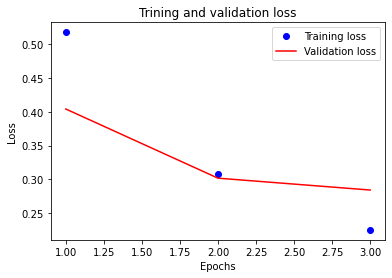

In [28]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Trining and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

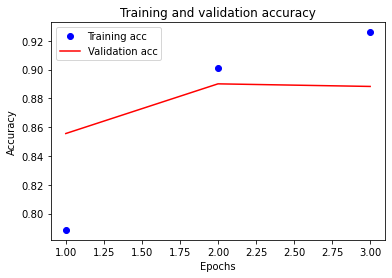

In [29]:
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'r-', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

In [30]:
# loss 값이 작은 거, 정확도가 높은 거 ...

In [32]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3036 - binary_accuracy: 0.8793


In [33]:
results

[0.30357789993286133, 0.8792799711227417]

In [34]:
model.predict(x_test)  # 1에 가까울수록 긍정적.

array([[0.28688946],
       [0.99776447],
       [0.79779077],
       ...,
       [0.11787882],
       [0.16249487],
       [0.5720632 ]], dtype=float32)